# Autoregressive Moving Average (ARMA)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



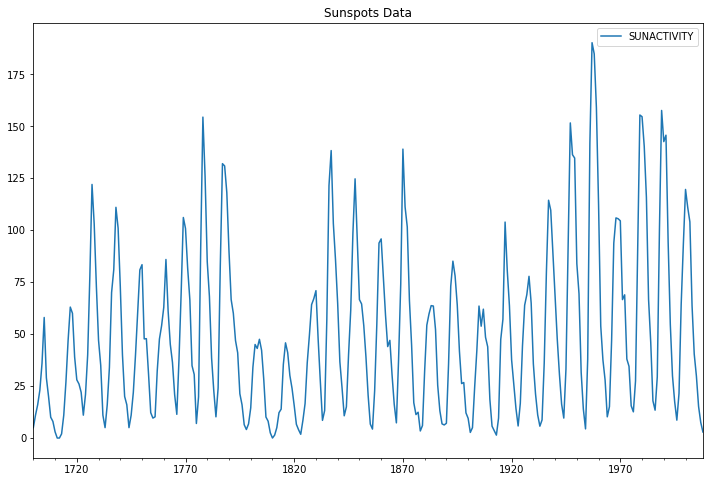

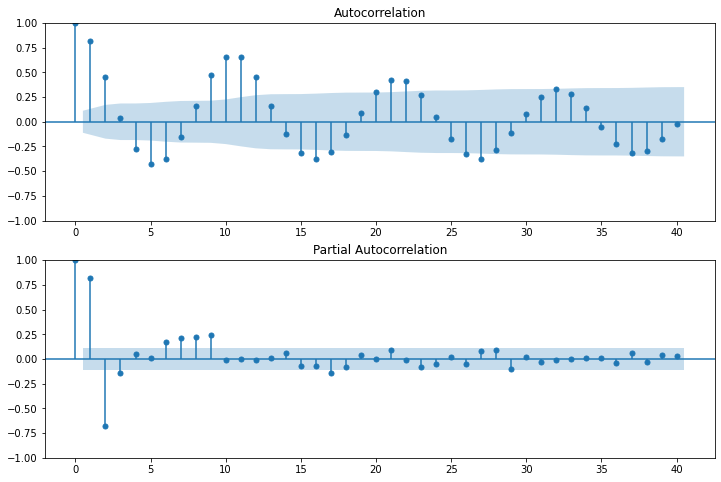


ARIMA(2, 0, 0) Model Parameters:
const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64

ARIMA(3, 0, 0) Model AIC, BIC, and HQIC:
2619.4036292456544 2638.0703356301433 2626.866614052212

ARIMA(3, 0, 0) Model Parameters:
const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [10]:
# Print dataset notes
print(sm.datasets.sunspots.NOTE)

# Load sunspots data
dta = sm.datasets.sunspots.load_pandas().data

# Set the index to the date range
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]  # Remove the YEAR column

# Plot the sunspots data
dta.plot(figsize=(12, 8))
plt.title('Sunspots Data')
plt.show()

# Plot autocorrelation and partial autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Fit ARIMA(2, 0, 0) model
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print("\nARIMA(2, 0, 0) Model Parameters:")
print(arma_mod20.params)

# Fit ARIMA(3, 0, 0) model
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
print("\nARIMA(3, 0, 0) Model AIC, BIC, and HQIC:")
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)
print("\nARIMA(3, 0, 0) Model Parameters:")
print(arma_mod30.params)



Durbin-Watson Statistic: 1.9564953614286726


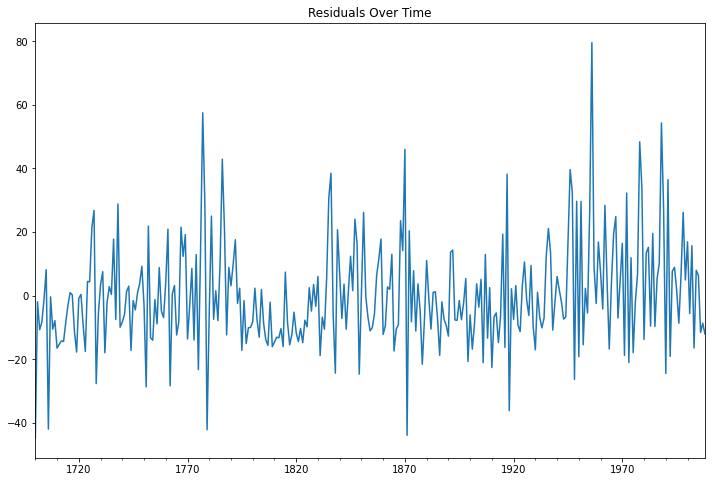


Normality Test for Residuals:
NormaltestResult(statistic=49.84393220753519, pvalue=1.5015079740757544e-11)


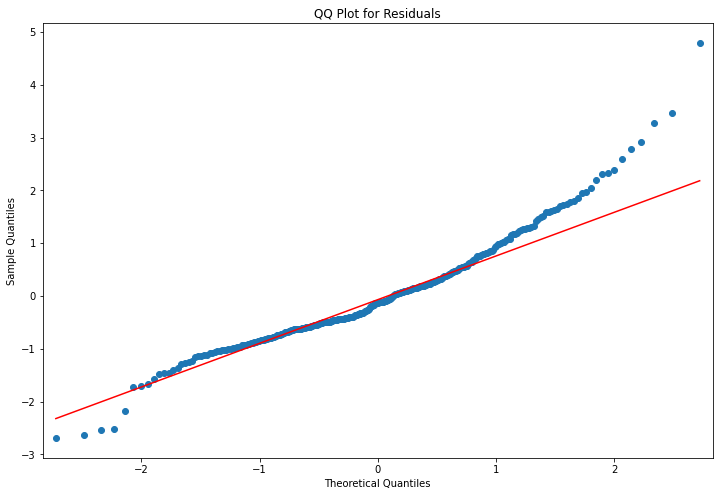

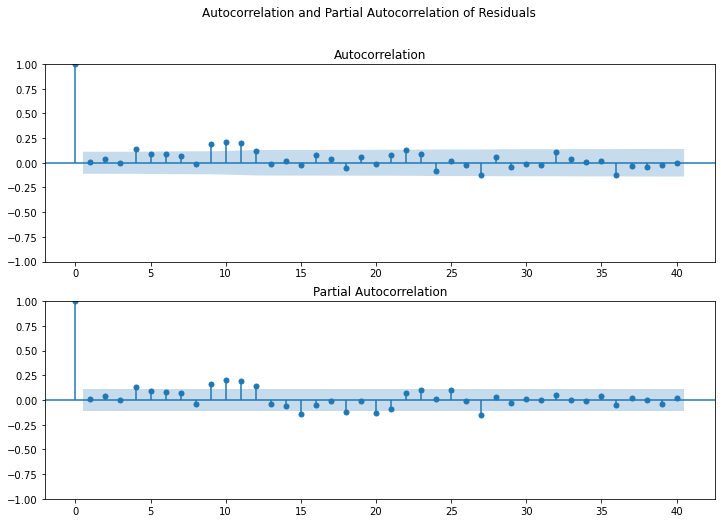


Ljung-Box Test for Residuals:
            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.0

In [11]:
# Durbin-Watson test for autocorrelation in residuals
durbin_watson_stat = sm.stats.durbin_watson(arma_mod30.resid.values)
print("\nDurbin-Watson Statistic:", durbin_watson_stat)
# A value around 2 suggests no significant autocorrelation in residuals.

# Plotting residuals over time
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)
plt.title('Residuals Over Time')
plt.show()

# Normality test for residuals
resid = arma_mod30.resid
normaltest_result = stats.normaltest(resid)
print("\nNormality Test for Residuals:")
print(normaltest_result)
# The p-value from the normality test indicates whether residuals are normally distributed.

# QQ plot for residuals
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
plt.title('QQ Plot for Residuals')
plt.show()

# Autocorrelation and partial autocorrelation of residuals
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.suptitle('Autocorrelation and Partial Autocorrelation of Residuals')
plt.show()

# Ljung-Box test for autocorrelation in residuals
r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[np.arange(1, 25), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print("\nLjung-Box Test for Residuals:")
print(table.set_index("lag"))
# High p-values for the Q statistics suggest no significant autocorrelation in residuals.



In-sample Dynamic Prediction:
1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64

Mean Forecast Error: 5.634832996990667


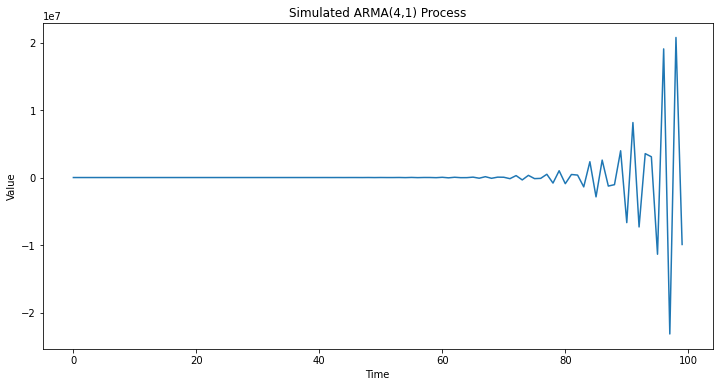

In [12]:
# In-sample dynamic prediction
predict_sunspots = arma_mod30.predict("1990", "2012", dynamic=True)
print("\nIn-sample Dynamic Prediction:")
print(predict_sunspots)

# Calculate mean forecast error
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

forecast_error = mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)
print("\nMean Forecast Error:", forecast_error)
# A lower mean forecast error indicates a better fit.

# Exercise: Obtaining a better fit for the Sunspots model using ARIMA order selection
# Hint: sm.tsa.AR has a method select_order
# ...

# Simulated ARMA(4,1): Model Identification is Difficult
from statsmodels.tsa.arima_process import ArmaProcess

# Seed for reproducibility
np.random.seed(1234)

# Simulate ARMA(4,1) process
arparams = np.array([1, 0.75, -0.65, -0.55, 0.9])
maparams = np.array([1, 0.65])

# Create an ARMA process
arma_process = ArmaProcess(arparams, maparams)

# Simulate data
simulated_data = arma_process.generate_sample(nsample=100)

# Plot simulated data
plt.figure(figsize=(12, 6))
plt.plot(simulated_data)
plt.title('Simulated ARMA(4,1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()



Is ARMA Process Invertible? True
Is ARMA Process Stationary? False


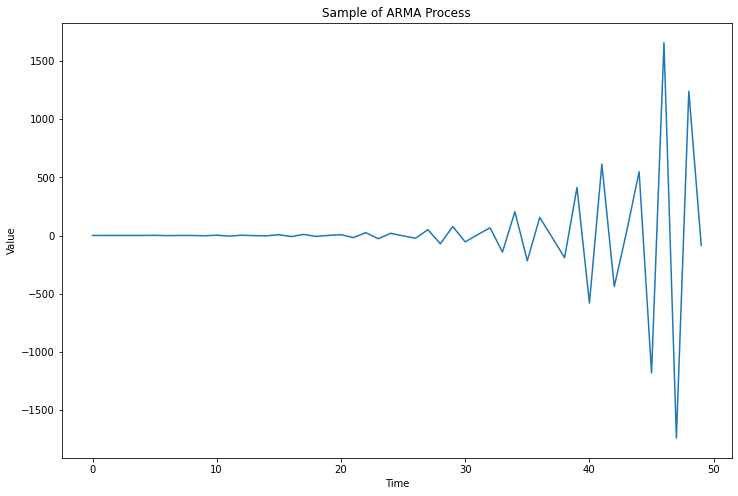


Is Modified ARMA Process Stationary? True


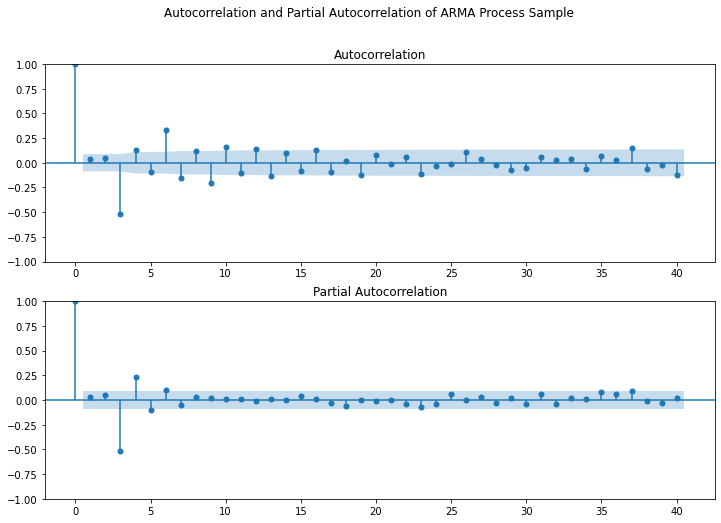

In [13]:
# Check if the ARMA process is invertible and stationary
arma_t = ArmaProcess(arparams, maparams)
print("\nIs ARMA Process Invertible?", arma_t.isinvertible)
print("Is ARMA Process Stationary?", arma_t.isstationary)

# Plot a sample of the ARMA process
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50))
plt.title('Sample of ARMA Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Modify AR parameters to make the process non-stationary
arparams = np.array([1, 0.35, -0.15, 0.55, 0.1])
maparams = np.array([1, 0.65])

# Create a new ARMA process with modified parameters
arma_t = ArmaProcess(arparams, maparams)

# Check if the modified ARMA process is stationary
print("\nIs Modified ARMA Process Stationary?", arma_t.isstationary)

# Generate a sample from the modified ARMA process
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

# Plot autocorrelation and partial autocorrelation of the sample
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)
plt.suptitle('Autocorrelation and Partial Autocorrelation of ARMA Process Sample')
plt.show()


In [14]:
# Determine the number of lags for autocorrelation functions
lags = int(10 * np.log10(arma_rvs.shape[0]))

# Fit ARIMA(1, 0, 1) model
arma11 = ARIMA(arma_rvs, order=(1, 0, 1)).fit()
resid = arma11.resid

# Calculate autocorrelation, Q statistic, and p-values
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print("\nAutocorrelation Functions for ARIMA(1, 0, 1) Model:")
print(table.set_index("lag"))

# Fit ARIMA(4, 0, 1) model
arma41 = ARIMA(arma_rvs, order=(4, 0, 1)).fit()
resid = arma41.resid

# Calculate autocorrelation, Q statistic, and p-values
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print("\nAutocorrelation Functions for ARIMA(4, 0, 1) Model:")
print(table.set_index("lag"))


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Autocorrelation Functions for ARIMA(1, 0, 1) Model:
            AC           Q      Prob(>Q)
lag                                     
1.0  -0.001981    0.001974  9.645581e-01
2.0   0.064924    2.126444  3.453413e-01
3.0  -0.523169  140.356205  3.167051e-30
4.0   0.146398  151.202017  1.124951e-31
5.0  -0.110501  157.393590  3.556041e-32
6.0   0.342633  217.043018  4.443370e-44
7.0  -0.170718  231.881312  1.977016e-46
8.0   0.128561  240.313235  1.943675e-47
9.0  -0.214588  263.852968  1.180757e-51
10.0  0.172668  279.125138  3.982419e-54
11.0 -0.116367  286.075755  7.479876e-55
12.0  0.151895  297.942792  1.269408e-56
13.0 -0.145052  308.786828  3.480791e-58
14.0  0.105443  314.528989  1.096809e-58
15.0 -0.093356  319.039448  6.103416e-59
16.0  0.136343  328.679870  2.848572e-60
17.0 -0.102697  334.160594  9.605366e-61
18.0  0.022905  334.433789  3.806291e-60
19.0 -0.124904  342.574844  3.490105e-61
20.0  0.079704  345.896789  3.119020e-61
21.0 -0.018478  346.075710  1.210567e-60
22.0

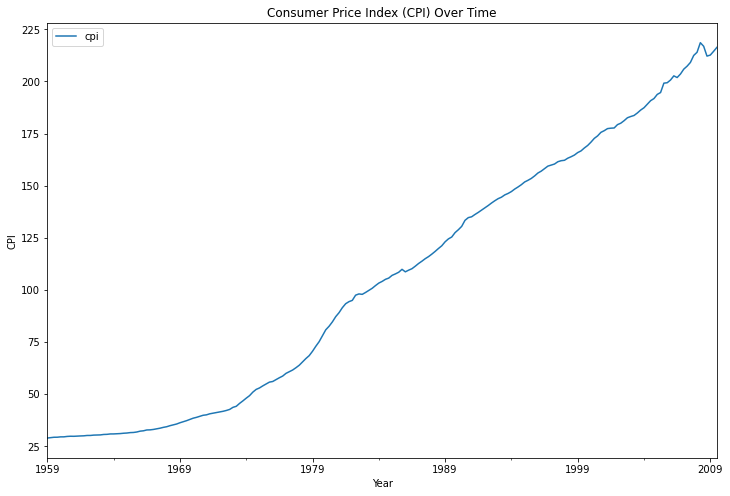


P-value of Augmented Dickey-Fuller Test: 0.9904328188337421


In [15]:
# Load macrodata and select the CPI series
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
cpi = macrodta["cpi"]

# Plot the CPI series
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax)
ax.legend()
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

# Perform the unit-root test (Augmented Dickey-Fuller test)
p_value_adf = sm.tsa.adfuller(cpi)[1]
print("\nP-value of Augmented Dickey-Fuller Test:", p_value_adf)
# A low p-value suggests rejecting the null hypothesis of a unit root, indicating stationarity.
